# 排序算法总结

排序算法的稳定性是指：经过排序之后,能使值相同的数据保持原顺序中的相对位置不变。
？？？？

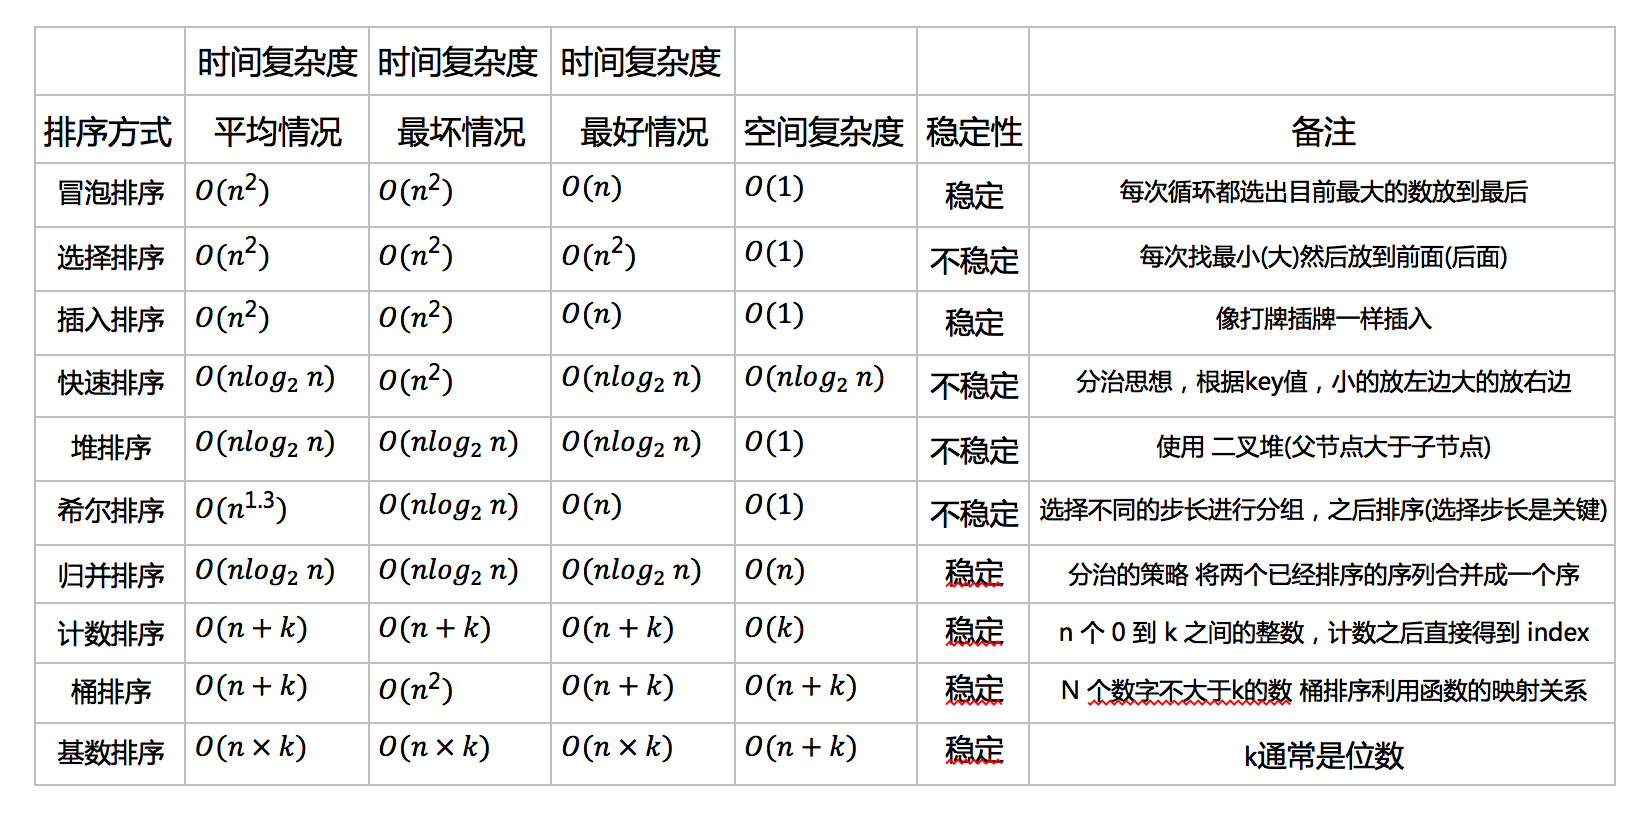

1. 若 n 较小(如 n≤50)，可采用直接插入或直接选择排序。当记录规模较小时，直接插入排序较好；否则因为直接选择移动的记录数少于直接插人，应选直接选择排序为宜。

2. 从平均时间来看，快速排序是效率最高的，但快速排序在最坏情况下的时间性能不如堆排序和归并排序。而后者相比较的结果是，当 n 较大，内存空间允许，且要求稳定性，使用归并排序。

3. 若文件初始状态基本有序(指正序)，则应选用直接插人(这种情况下最好的方法)、冒泡为宜。无序性高的时候：快速排序，也可以用希尔排序。

4. 从方法的稳定性来比较，基数排序是稳定的内排方法，所有时间复杂度为O(n^2)的简单排序也是稳定的。但是快速排序、堆排序、希尔排序等时间性能较好的排序方法都是不稳定的。稳定性需要根据具体需求选择。

5. 上面的算法实现大多数是使用线性存储结构，像插入排序这种算法用链表实现更好，省去了移动元素的时间。具体的存储结构在具体的实现版本中也是不同的。


# Common sorting algorithms

## bubble Sort 冒泡排序

Running time: $O(n^2)$ average and worst case

**原理**：比较两个相邻的元素，将值大的元素交换至右端。

**思路**：依次比较相邻的两个数，将小数放在前面，大数放在后面。即在第一趟：首先比较第1个和第2个数，将小数放前，大数放后。然后比较第2个数和第3个数，将小数放前，大数放后，如此继续，直至比较最后两个数，将小数放前，大数放后。重复第一趟
步骤，直至全部排序完成。

 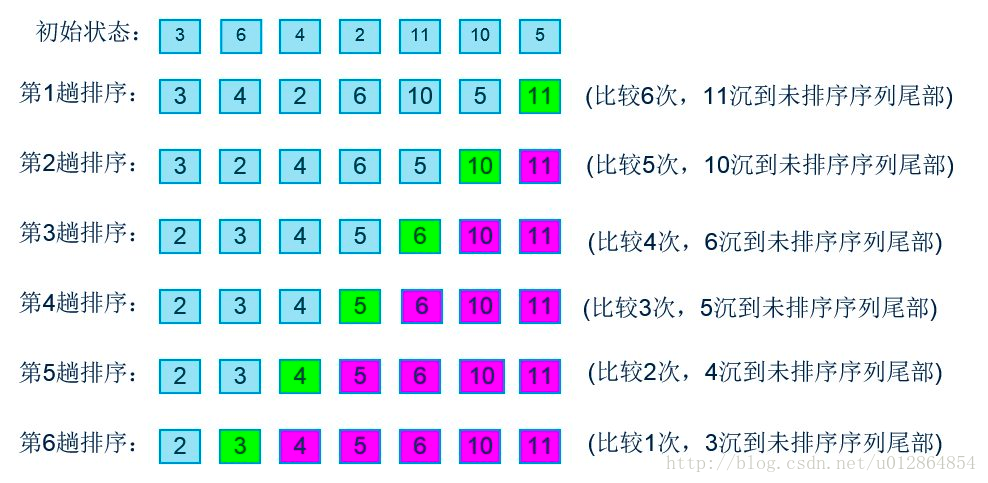
 
 由此可见：N个数字要排序完成，总共进行N-1趟排序，每i趟的排序次数为(N-i)次，所以可以用双重循环语句，外层控制循环多少趟，内层控制每一趟的循环次数。

##### 代码实现

In [10]:
def bubble_sort(input_list):
    
    n = len(input_list)
    
    # number of rounds
    for i in range(n-1):
        # times of each round
        for j in range(n-i-1):
            if input_list[j] > input_list[j+1]:
                input_list[j], input_list[j+1] = input_list[j+1], input_list[j]
                
    return input_list

##### Test

In [11]:
list = [1,3,4,90,34,1,100]
list_sorted = bubble_sort(list)
list_sorted_verify = sorted(list_sorted)
print(list_sorted)
list_sorted == list_sorted_verify

[1, 1, 3, 4, 34, 90, 100]


True

## Slection Sort 选择排序

Running time: $O(n^2)$ average and worst case

选择排序也是一种简单直观的排序算法。

它的工作原理很容易理解：

1. 初始时在序列中找到最小（大）元素，放到序列的起始位置作为已排序序列；
2. 然后，再从剩余未排序元素中继续寻找最小（大）元素，放到已排序序列的末尾。
3. 以此类推，直到所有元素均排序完毕。

注：每一趟排序获得最小数的方法：for 循环进行比较，定义一个第三个变量temp，首先前两个数比较，把较小的数放在temp中，然后用temp再去跟剩下的数据比较，如果出现比temp小的数据，就用它代替temp中原有的数据。选择排序的时间复杂度为 O(n^2)，并且是不稳定的。

 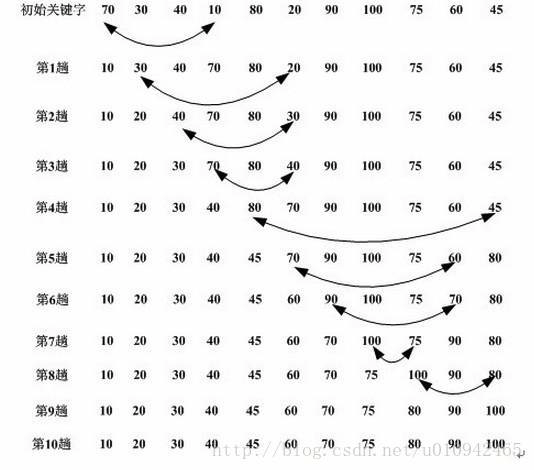

In [25]:
def Slection_sort(input_list):
    
    n = len(input_list)
    # The number of rounds
    for i in range(n-1):
        # the times of each round
        temp_index = None
        for j in range(i, n-1):
            if temp_index == None: temp_index = j
            if input_list[j] < input_list[temp_index]:
                temp_index = j
        print(temp_index)
        input_list[i], input_list[temp_index] = input_list[temp_index], input_list[i]
        print(input_list)
                
    return input_list

In [26]:
list = [5,3,4,90,34,1,100]
list_sorted = Slection_sort(list)
list_sorted_verify = sorted(list_sorted)
print(list_sorted)
list_sorted == list_sorted_verify

5
[1, 3, 4, 90, 34, 5, 100]
1
[1, 3, 4, 90, 34, 5, 100]
2
[1, 3, 4, 90, 34, 5, 100]
5
[1, 3, 4, 5, 34, 90, 100]
4
[1, 3, 4, 5, 34, 90, 100]
5
[1, 3, 4, 5, 34, 90, 100]
[1, 3, 4, 5, 34, 90, 100]


True

## Merge Sort 归并排序

Running time: $O(nlog(n))$ average and worst case

归并排序（MERGE-SORT）是利用归并的思想实现的排序方法，该算法采用经典的分治（divide-and-conquer）策略。

归并操作(Merge)，也叫归并算法，指的是将两个已经排序的序列合并成一个序列的操作。归并排序算法依赖归并操作。归并排序有多路归并排序、两路归并排序 , 可用于内排序，也可以用于外排序。这里仅对内排序的两路归并方法进行讨论。

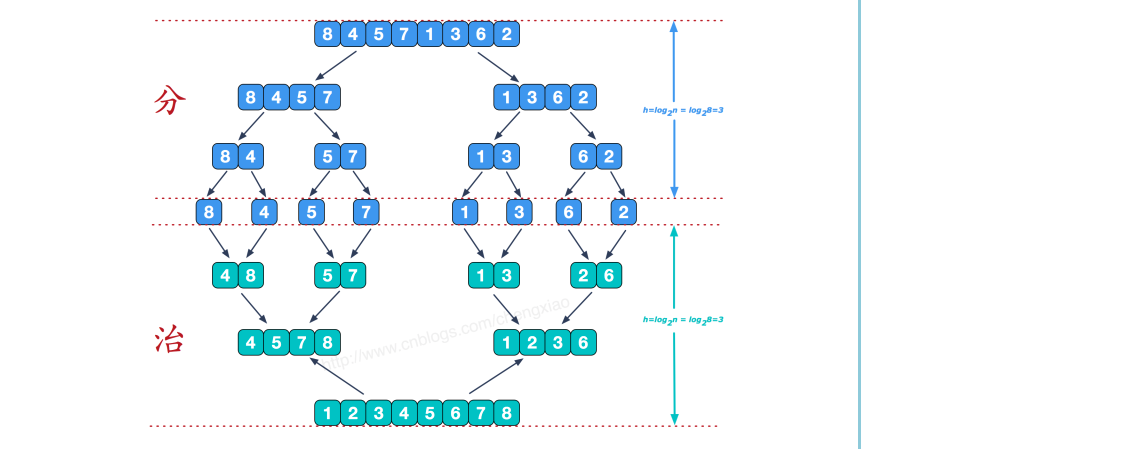

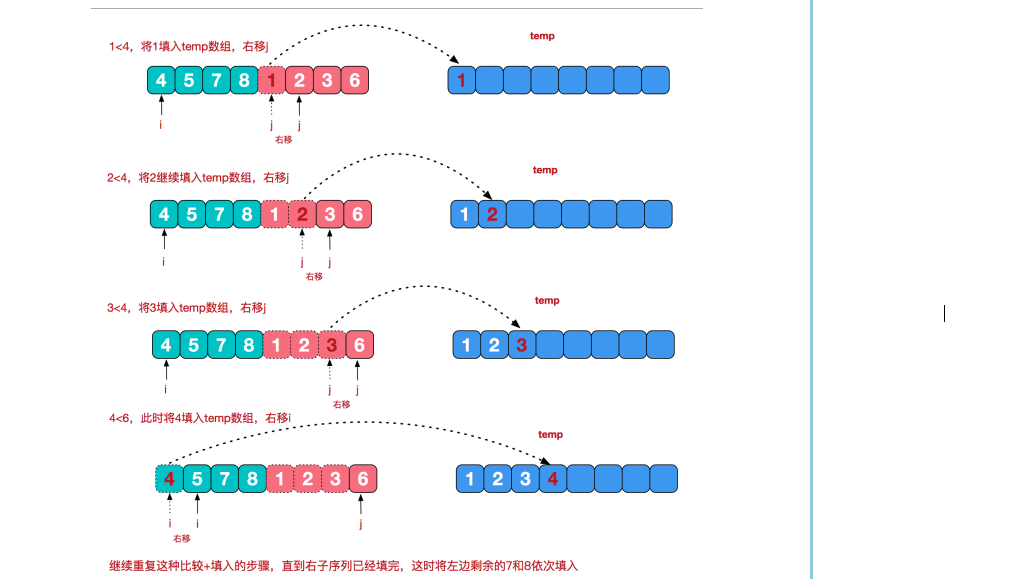

#### 归并算法


Problem：将两个sorted list合并成一个sorted list

In [51]:
def merge_two_sorted_list(list_a, list_b):
    
    result_list = []
    len_a, len_b = len(list_a), len(list_b)
    i, j = 0, 0
    while i < len_a and j < len_b:
        if list_a[i] < list_b[j]:
            result_list.append(list_a[i])
            i = i + 1
        else: 
            result_list.append(list_b[j])
            j = j + 1
            
    print(result_list, i, j)
    if i < len_a: result_list + list_a[i:]
    if j < len_b: result_list + list_b[j:]
                
    return result_list

In [52]:
list_a = [1, 3, 5, 6]
list_b = [3, 5, 5, 9]

result_list = merge_two_sorted_list(list_a, list_b)

[1, 3, 3, 5, 5, 5, 6] 4 3
